# STINTSY MCO
The Major Course Output for STINTSY (Advanced Intelligent Systems) will include 11 sections. The following sections are:
- **Section 1** : Introduction to the problem/task and dataset
- **Section 2** : Description of the dataset
- **Section 3** : List of requirements
- **Section 4** : Data preprocessing and cleaning
- **Section 5** : Exploratory data analysis
- **Section 6** : Initial model training
- **Section 7** : Error analysis
- **Section 8** : Improving model performance
- **Section 9** : Model Performance Summary
- **Section 10** : Insights and conclusions
- **Section 11** : References

## Section 1 : Introduction 

Each group should select one real-world dataset from the list of datasets provided for the project. Each dataset is accompanied with a description file, which also contains detailed description of each feature.

The target task (i.e., classification or regression) should be properly stated as well.

## Section 2 : Description of Dataset
In this section of the notebook, you must fulfill the following:
- State a brief description of the dataset.
- Provide a description of the collection process executed to build the dataset. Discuss the implications of the data collection method on the generated conclusions and insights. Note that you may need to look at relevant sources related to the dataset to acquire necessary information for this part of the project.
- Describe the structure of the dataset file.
    - What does each row and column represent?
    - How many instances are there in the dataset?
    - How many features are there in the dataset?
    - If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.
- Discuss the features in each dataset file. What does each feature represent? All features, even those which are not used for the study, should be described to the reader. The purpose of each feature in the dataset should be clear to the reader of the notebook without having to go through an external link.

## Section 3 : List of Requirements
List all the Python libraries and modules that you used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math

## Section 4 : Data Preprocessing and Cleaning

Perform necessary steps before using the data. In this section of the notebook, please take note of the following:

- If needed, perform preprocessing techniques to transform the data to the appropriate representation. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering, among others. There should be a correct and proper justification for the use of each preprocessing technique used in the project.
- Make sure that the data is clean, especially features that are used in the project. This may include checking for misrepresentations, checking the data type, dealing with missing data, dealing with duplicate data, and dealing with outliers, among others. There should be a correct and proper justification for the application (or non-application) of each data cleaning method used in the project. Clean only the variables utilized in the study.

### Section 4.1 : Pandas Library for Identfying Null Values
This section identifies Null values of the dataset

In [2]:
# Define the filename
filename = "dataset.csv"

# Define the column names based on the provided features
columns = [
    "W_REGN", "W_OID", "W_SHSN", "W_HCN", "URB", "RSTR", "PSU", "BWEIGHT", "RFACT", "FSIZE",
    "AGRI_SAL", "NONAGRI_SAL", "WAGES", "NETSHARE", "CASH_ABROAD", "CASH_DOMESTIC", "RENTALS_REC", "INTEREST",
    "PENSION", "DIVIDENDS", "OTHER_SOURCE", "NET_RECEIPT", "REGFT", "NET_CFG", "NET_LPR", "NET_FISH", "NET_FOR",
    "NET_RET", "NET_MFG", "NET_COM", "NET_TRANS", "NET_MIN", "NET_CONS", "NET_NEC", "EAINC", "TOINC", "LOSSES",
    "T_BREAD", "T_MEAT", "T_FISH", "T_MILK", "T_OIL", "T_FRUIT", "T_VEG", "T_SUGAR", "T_FOOD_NEC", "T_COFFEE",
    "T_MINERAL", "T_ALCOHOL", "T_TOBACCO", "T_OTHER_VEG", "T_FOOD_HOME", "T_FOOD_OUTSIDE", "T_FOOD", "T_CLOTH",
    "T_FURNISHING", "T_HEALTH", "T_HOUSING_WATER", "T_ACTRENT", "T_RENTVAL", "T_IMPUTED_RENT", "T_BIMPUTED_RENT",
    "T_TRANSPORT", "T_COMMUNICATION", "T_RECREATION", "T_EDUCATION", "T_MISCELLANEOUS", "T_OTHER_EXPENDITURE",
    "T_OTHER_DISBURSEMENT", "T_NFOOD", "T_TOTEX", "T_TOTDIS", "T_OTHREC", "T_TOREC", "FOOD_ACCOM_SRVC", "SEX",
    "AGE", "MS", "HGC", "JOB", "OCCUP", "KB", "CW", "HHTYPE", "MEMBERS", "AGELESS5", "AGE5_17", "EMPLOYED_PAY",
    "EMPLOYED_PROF", "SPOUSE_EMP", "BLDG_TYPE", "ROOF", "WALLS", "TENURE", "HSE_ALTERTN", "TOILET", "ELECTRIC",
    "WATER", "DISTANCE", "RADIO_QTY", "TV_QTY", "CD_QTY", "STEREO_QTY", "REF_QTY", "WASH_QTY", "AIRCON_QTY",
    "CAR_QTY", "LANDLINE_QTY", "CELLPHONE_QTY", "PC_QTY", "OVEN_QTY", "MOTOR_BANCA_QTY", "MOTORCYCLE_QTY",
    "POP_ADJ", "PCINC", "NATPC", "NATDC", "REGDC", "REGPC"
]

# Define integer and float columns
int_cols = [col for col in columns if col not in ["BWEIGHT", "RFACT", "FSIZE", "POP_ADJ", "PCINC"]]
float_cols = ["BWEIGHT", "RFACT", "FSIZE", "POP_ADJ", "PCINC"]

# Load the CSV file
df = pd.read_csv(filename, usecols=columns, dtype=str)  # Read everything as strings first

# Strip whitespace efficiently using applymap replacement
df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

# Convert data types safely
for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')  # Allows None for missing integers
for col in float_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)  # Convert safely to float

In [3]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df.isnull().sum())

W_REGN                      0
W_OID                       0
W_SHSN                      0
W_HCN                       0
URB                         0
RSTR                        0
PSU                         0
BWEIGHT                     0
RFACT                       0
FSIZE                       0
AGRI_SAL                    0
NONAGRI_SAL                 0
WAGES                       0
NETSHARE                    0
CASH_ABROAD                 0
CASH_DOMESTIC               0
RENTALS_REC                 0
INTEREST                    0
PENSION                     0
DIVIDENDS                   0
OTHER_SOURCE                0
NET_RECEIPT                 0
REGFT                       0
NET_CFG                     0
NET_LPR                     0
NET_FISH                    0
NET_FOR                     0
NET_RET                     0
NET_MFG                     0
NET_COM                     0
NET_TRANS                   0
NET_MIN                     0
NET_CONS                    0
NET_NEC   

### Section 4.2 : Numpy array
This section will fetch the csv file and transfer it to a numpy array

In [4]:
import csv
import numpy as np

filename = "dataset.csv"

columns = [
    "W_REGN", "W_OID", "W_SHSN", "W_HCN", "URB", "RSTR", "PSU", "BWEIGHT", "RFACT", "FSIZE",
    "AGRI_SAL", "NONAGRI_SAL", "WAGES", "NETSHARE", "CASH_ABROAD", "CASH_DOMESTIC", "RENTALS_REC", "INTEREST",
    "PENSION", "DIVIDENDS", "OTHER_SOURCE", "NET_RECEIPT", "REGFT", "NET_CFG", "NET_LPR", "NET_FISH", "NET_FOR",
    "NET_RET", "NET_MFG", "NET_COM", "NET_TRANS", "NET_MIN", "NET_CONS", "NET_NEC", "EAINC", "TOINC", "LOSSES",
    "T_BREAD", "T_MEAT", "T_FISH", "T_MILK", "T_OIL", "T_FRUIT", "T_VEG", "T_SUGAR", "T_FOOD_NEC", "T_COFFEE",
    "T_MINERAL", "T_ALCOHOL", "T_TOBACCO", "T_OTHER_VEG", "T_FOOD_HOME", "T_FOOD_OUTSIDE", "T_FOOD", "T_CLOTH",
    "T_FURNISHING", "T_HEALTH", "T_HOUSING_WATER", "T_ACTRENT", "T_RENTVAL", "T_IMPUTED_RENT", "T_BIMPUTED_RENT",
    "T_TRANSPORT", "T_COMMUNICATION", "T_RECREATION", "T_EDUCATION", "T_MISCELLANEOUS", "T_OTHER_EXPENDITURE",
    "T_OTHER_DISBURSEMENT", "T_NFOOD", "T_TOTEX", "T_TOTDIS", "T_OTHREC", "T_TOREC", "FOOD_ACCOM_SRVC", "SEX",
    "AGE", "MS", "HGC", "JOB", "OCCUP", "KB", "CW", "HHTYPE", "MEMBERS", "AGELESS5", "AGE5_17", "EMPLOYED_PAY",
    "EMPLOYED_PROF", "SPOUSE_EMP", "BLDG_TYPE", "ROOF", "WALLS", "TENURE", "HSE_ALTERTN", "TOILET", "ELECTRIC",
    "WATER", "DISTANCE", "RADIO_QTY", "TV_QTY", "CD_QTY", "STEREO_QTY", "REF_QTY", "WASH_QTY", "AIRCON_QTY",
    "CAR_QTY", "LANDLINE_QTY", "CELLPHONE_QTY", "PC_QTY", "OVEN_QTY", "MOTOR_BANCA_QTY", "MOTORCYCLE_QTY",
    "POP_ADJ", "PCINC", "NATPC", "NATDC", "REGDC", "REGPC"
]

# int and float columns
int_cols = [col for col in columns if col not in ["BWEIGHT", "RFACT", "FSIZE", "POP_ADJ", "PCINC"]]
float_cols = ["BWEIGHT", "RFACT", "FSIZE", "POP_ADJ", "PCINC"]

data = []

# reading the csv file
with open(filename, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        processed_row = []
        for col in columns:
            value = row[col].strip() if col in row and row[col] else ""
            if col in int_cols:
                processed_row.append(int(value) if value.isdigit() else None)  # handle missing values as None
            elif col in float_cols:
                try:
                    processed_row.append(float(value))  # convert float columns
                except ValueError:
                    processed_row.append(np.nan)  # handle missing values as NaN
        data.append(processed_row)

# Convert to NumPy array
raw_data = np.array(data, dtype=object)

In [5]:
# print the first few rows of the array to verify (check dataset.csv)
print(raw_data[:2])

[[14 101001000 2 25 2 21100 415052 138.25 200.6576 3.0 0 0 0 0 176000
  16000 0 0 33000 0 0 4385 76666 0 0 0 0 0 0 0 0 0 0 0 0 325251 0 30263
  29374 5204 3533 2136 2129 6517 1149 2472 1890 6356 0 0 0 91023 23330
  114353 11191 3598 586 55128 0 19200 19200 0 17280 1470 49567 41200
  18636 260 0 198916 313269 313269 0 325251 0 2 75 3 280 2 None None None
  2 3 None 1 None None 3 1 1 1 1 2 1 1 1 None 1 1 1 1 1 1 None None None
  2 1 1 None None 0.94617231 108417.0 9 8 8 9]
 [14 101001000 3 43 2 21100 415052 138.25 200.6576 12.5 0 0 0 0 0 14700 0
  0 0 0 0 1350 369 0 0 0 0 355776 0 0 8000 0 0 0 363776 382895 0 97693
  5820 28836 14484 3016 1230 7885 4145 1875 2532 9076 0 2450 0 176592
  8925 185517 3335 4304 1645 24492 0 2700 2700 0 8826 3480 1136 1180
  10260 0 0 61108 246625 246625 0 382895 0 1 48 2 250 1 1314 4741 3 2 13
  2 4 None 1 2 1 5 5 1 2 3 1 1 None 1 1 1 2 None None None None None 3
  None 1 None 1 0.94617231 30631.6 5 9 9 4]]


### Dicitonaries
This seciton of the notebook defined the dictionaries needed for classification algorithm/s.
- W_REGN = W_REGN_dict
- W_OID = W_OID_dict
- URB_VS1 = URB_VS1_dict
- NATPC_VS1 & NATDC_VS1 & REGDC_VS1 & REGPC_VS1 = RID_dict

In [6]:
W_REGN_dict = {
    13: "Region XIII - NCR",
    14: "Region XIV - CAR",
    1: "Region I - Ilocos Region",
    2: "Region II - Cagayan Valley",
    3: "Region III - Central Luzon",
    41: "Region IVa - Calabarzon",
    42: "Region IVb - Mimaropa",
    5: "Region V - Bicol Region",
    6: "Region VI - Western Visayas",
    7: "Region VII - Central Visayas",
    8: "Region VIII - Eastern Visayas",
    9: "Region IX - Western Mindanao",
    10: "Region X - Northern Mindanao",
    11: "Region XI - Southern Mindanao",
    12: "Region XII - Central Mindanao",
    15: "Region XV - ARMM",
    16: "Region XVI - CARAGA"
}

W_OID_dict = {
    39: "Manila",
    74: "NCR-2nd Dist.",
    75: "NCR-3rd Dist.",
    76: "NCR-4th Dist.",
    1: "Abra",
    27: "Benguet",
    32: "Ifugao",
    44: "Kalinga",
    81: "Mountain Province",
    28: "Apayao",
    29: "Ilocos Norte",
    33: "Ilocos Sur",
    55: "La Union",
    9: "Pangasinan",
    15: "Batanes",
    31: "Cagayan",
    50: "Isabela",
    57: "Nueva Vizcaya",
    8: "Quirino",
    49: "Bataan",
    54: "Bulacan",
    69: "Nueva Ecija",
    77: "Pampanga",
    10: "Tarlac",
    21: "Zambales",
    34: "Aurora",
    56: "Batangas",
    58: "Cavite",
    40: "Laguna",
    51: "Quezon",
    52: "Rizal",
    53: "Marinduque",
    59: "Occidental Mindoro",
    5: "Oriental Mindoro",
    16: "Palawan",
    17: "Romblon",
    20: "Albay",
    41: "Camarines Norte",
    62: "Camarines Sur",
    4: "Catanduanes",
    6: "Masbate",
    19: "Sorsogon",
    30: "Aklan",
    45: "Antique",
    12: "Capiz",
    79: "Iloilo",
    22: "Negros Occidental",
    46: "Guimaras",
    61: "Bohol",
    26: "Negros Oriental",
    37: "Siquijor",
    48: "Eastern Samar",
    60: "Leyte",
    64: "Northern Samar",
    78: "Samar (Western)",
    72: "Southern Leyte",
    73: "Biliran",
    83: "Zamboanga del Norte",
    97: "Zamboanga del Sur",
    13: "Zamboanga Sibugay",
    18: "Isabela City",
    35: "Bukidnon",
    42: "Camiguin",
    43: "Lanao del Norte",
    23: "Misamis Occidental",
    24: "Misamis Oriental",
    25: "Davao",
    82: "Davao de Sur",
    47: "Davao Oriental",
    63: "Compostela Valley",
    65: "Cotabato",
    80: "South Cotabato",
    98: "Sultan Kudarat",
    7: "Sarangani",
    36: "Cotabato City",
    38: "Basilan",
    66: "Lanao del Sur",
    70: "Maguindanao",
    2: "Sulu",
    67: "Tawi-tawi",
    68: "Agusan del Norte",
    3: "Agusan del Sur",
    67: "Surigao del Norte",
    68: "Surigao del Sur"
}

URB_VS1_dict = {
    1 : "Urban",
    2 : "Rural"
}

RID_dict = {
    1: "First Decile",
    2: "Second Decile",
    3: "Third Decile",
    4: "Fourth Decile",
    5: "Fifth Decile",
    6: "Sixth Decile",
    7: "Seventh Decile",
    8: "Eighth Decile",
    9: "Ninth Decile",
    10: "Tenth Decile"
}

In [7]:
numeric_cols = ["TOINC", "FSIZE", "HGC", "AGE", "WAGES", "T_FOOD", "T_NFOOD", "T_TOTEX"]
df[numeric_cols] = df[numeric_cols].astype(float)

## Section 5 : Exploratory Data Analysis

Perform exploratory data analysis comprehensively to gain a good understanding of your dataset. In this section of the notebook, you must present relevant numerical summaries and visualizations. Make sure that each code is accompanied by a brief explanation. The whole process should be supported with verbose textual descriptions of your procedures and findings.

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 119 columns):
 #    Column                Dtype  
---   ------                -----  
 0    W_REGN                Int64  
 1    W_OID                 Int64  
 2    W_SHSN                Int64  
 3    W_HCN                 Int64  
 4    URB                   Int64  
 5    RSTR                  Int64  
 6    PSU                   Int64  
 7    BWEIGHT               float64
 8    RFACT                 float64
 9    FSIZE                 float64
 10   AGRI_SAL              Int64  
 11   NONAGRI_SAL           Int64  
 12   WAGES                 float64
 13   NETSHARE              Int64  
 14   CASH_ABROAD           Int64  
 15   CASH_DOMESTIC         Int64  
 16   RENTALS_REC           Int64  
 17   INTEREST              Int64  
 18   PENSION               Int64  
 19   DIVIDENDS             Int64  
 20   OTHER_SOURCE          Int64  
 21   NET_RECEIPT           Int64  
 22   REGFT               

In [9]:
df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,AGRI_SAL,NONAGRI_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_COM,NET_TRANS,NET_MIN,NET_CONS,NET_NEC,EAINC,TOINC,LOSSES,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,T_SUGAR,T_FOOD_NEC,T_COFFEE,T_MINERAL,T_ALCOHOL,T_TOBACCO,T_OTHER_VEG,T_FOOD_HOME,T_FOOD_OUTSIDE,T_FOOD,T_CLOTH,T_FURNISHING,T_HEALTH,T_HOUSING_WATER,T_ACTRENT,T_RENTVAL,T_IMPUTED_RENT,T_BIMPUTED_RENT,T_TRANSPORT,T_COMMUNICATION,T_RECREATION,T_EDUCATION,T_MISCELLANEOUS,T_OTHER_EXPENDITURE,T_OTHER_DISBURSEMENT,T_NFOOD,T_TOTEX,T_TOTDIS,T_OTHREC,T_TOREC,FOOD_ACCOM_SRVC,SEX,AGE,MS,HGC,JOB,OCCUP,KB,CW,HHTYPE,MEMBERS,AGELESS5,AGE5_17,EMPLOYED_PAY,EMPLOYED_PROF,SPOUSE_EMP,BLDG_TYPE,ROOF,WALLS,TENURE,HSE_ALTERTN,TOILET,ELECTRIC,WATER,DISTANCE,RADIO_QTY,TV_QTY,CD_QTY,STEREO_QTY,REF_QTY,WASH_QTY,AIRCON_QTY,CAR_QTY,LANDLINE_QTY,CELLPHONE_QTY,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,0,0,0.0,0,176000,16000,0,0,33000,0,0,4385,76666,0,0,0,0,0,0,0,0,0,0,0,0,325251.0,0,30263,29374,5204,3533,2136,2129,6517,1149,2472,1890,6356,0,0,0,91023,23330,114353.0,11191,3598,586,55128,0,19200,19200,0,17280,1470,49567,41200,18636,260,0,198916.0,313269.0,313269,0,325251,0,2,75.0,3,280.0,2,<NA>,<NA>,<NA>,2,3,<NA>,1,<NA>,<NA>,3,1,1,1,1,2,1,1,1,<NA>,1,1,1,1,1,1,<NA>,<NA>,<NA>,2,1,1,<NA>,<NA>,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,0,0,0.0,0,0,14700,0,0,0,0,0,1350,369,0,0,0,0,355776,0,0,8000,0,0,0,363776,382895.0,0,97693,5820,28836,14484,3016,1230,7885,4145,1875,2532,9076,0,2450,0,176592,8925,185517.0,3335,4304,1645,24492,0,2700,2700,0,8826,3480,1136,1180,10260,0,0,61108.0,246625.0,246625,0,382895,0,1,48.0,2,250.0,1,1314,4741,3,2,13,2,4,<NA>,1,2,1,5,5,1,2,3,1,1,<NA>,1,1,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,1,<NA>,1,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,0,0,0.0,31500,95000,0,0,1500,10500,0,0,1625,14830,4030,0,0,0,0,0,0,0,0,0,0,4030,173985.0,0,14699,13457,7811,1222,1788,2610,5560,1212,1500,582,2704,2070,0,0,53145,1500,54645.0,5455,3161,7258,40560,0,15000,15000,0,10380,5598,0,0,10224,1615,5000,86321.0,140966.0,145966,3684,177669,0,1,55.0,2,552.0,2,<NA>,<NA>,<NA>,2,2,<NA>,<NA>,<NA>,<NA>,2,2,1,1,1,2,1,1,1,<NA>,1,1,1,<NA>,1,<NA>,1,1,<NA>,1,<NA>,1,<NA>,<NA>,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,0,0,0.0,0,66000,0,0,0,14000,0,0,7649,29394,48010,2250,0,0,0,0,0,0,0,0,0,50260,173303.0,0,27846,7787,5106,4112,1713,1530,5435,2262,2539,1386,1214,0,0,0,60930,11130,72060.0,6750,21548,5400,33714,0,6000,6000,0,3210,2502,1012,430,10020,15,0,84601.0,156661.0,156661,23580,196883,0,1,44.0,2,830.0,1,6111,112,4,1,4,<NA>,2,<NA>,1,2,1,1,1,1,2,1,1,6,3,1,1,1,1,1,2,<NA>,<NA>,<NA>,2,<NA>,1,<NA>,<NA>,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,0,32000,32000.0,12600,0,18000,0,0,0,0,0,7359,130,0,0,0,0,0,0,0,63320,0,0,0,63320,187409.0,0,29573,11704,8765,4056,1138,1385,4250,1956,1272,1144,1430,1950,1638,0,66673,5180,71853.0,2390,2871,90,70812,0,54000,54000,0,10050,1902,425,10600,5274,0,0,108002.0,179855.0,179855,2300,189709,0,1,42.0,2,350.0,1,5220,4775,1,2,5,<NA>,2,1,1,2,1,1,1,1,2,1,1,1,<NA>,1,1,1,<NA>,1,1,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,1,0.946172,37481.80,6,6,6,5


### Section 5.1 : Univariate Analysis

In [10]:
df.describe()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,AGRI_SAL,NONAGRI_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_COM,NET_TRANS,NET_MIN,NET_CONS,NET_NEC,EAINC,TOINC,LOSSES,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,T_SUGAR,T_FOOD_NEC,T_COFFEE,T_MINERAL,T_ALCOHOL,T_TOBACCO,T_OTHER_VEG,T_FOOD_HOME,T_FOOD_OUTSIDE,T_FOOD,T_CLOTH,T_FURNISHING,T_HEALTH,T_HOUSING_WATER,T_ACTRENT,T_RENTVAL,T_IMPUTED_RENT,T_BIMPUTED_RENT,T_TRANSPORT,T_COMMUNICATION,T_RECREATION,T_EDUCATION,T_MISCELLANEOUS,T_OTHER_EXPENDITURE,T_OTHER_DISBURSEMENT,T_NFOOD,T_TOTEX,T_TOTDIS,T_OTHREC,T_TOREC,FOOD_ACCOM_SRVC,SEX,AGE,MS,HGC,JOB,OCCUP,KB,CW,HHTYPE,MEMBERS,AGELESS5,AGE5_17,EMPLOYED_PAY,EMPLOYED_PROF,SPOUSE_EMP,BLDG_TYPE,ROOF,WALLS,TENURE,HSE_ALTERTN,TOILET,ELECTRIC,WATER,DISTANCE,RADIO_QTY,TV_QTY,CD_QTY,STEREO_QTY,REF_QTY,WASH_QTY,AIRCON_QTY,CAR_QTY,LANDLINE_QTY,CELLPHONE_QTY,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
count,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.000000,40171.000000,40171.000000,40171.0,40171.0,4.017100e+04,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,4.017100e+04,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.000000,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,4.017100e+04,4.017100e+04,40171.0,40171.0,40171.0,40171.0,40171.0,40171.000000,40171.0,40171.000000,40171.0,32797.0,32797.0,32797.0,40171.0,40171.0,24810.0,31934.0,31875.0,27473.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,40171.0,23365.0,24118.0,32359.0,25905.0,17158.0,22390.0,20065.0,14541.0,14014.0,14038.0,33746.0,16741.0,16038.0,12635.0,17043.0,40171.000000,4.017100e+04,40171.0,40171.0,40171.0,40171.0
mean,13.01989,4210535869.679147,9.633666,1563.601753,1.617311,21547.277215,258123.702099,340.330363,533.363298,4.699223,8175.134973,89465.966667,9.764110e+04,1572.898982,23133.416221,10114.173434,1712.771726,212.662617,7471.283214,541.93453,81.86433,2924.002713,4996.110478,12866.479998,1273.351373,2834.414204,356.371985,16910.319285,2031.598143,4471.084862,5224.03271,413.382614,636.537652,1676.064698,48693.637525,2.176187e+05,13.043066,23060.716512,10308.292923,10189.690772,5127.613278,1361.246272,2459.583033,4727.992134,1805.326554,1922.052749,2450.116178,2385.055612,1142.279406,1554.294342,34.876528,65797.686017,12272.811232,78070.497249,4394.934729,4779.62565,6445.111673,35401.937965,1958.34154,20528.687162,18522.826268,47.519355,12926.799183,4573.355904,2418.974509,7256.78136,11726.904633,6091.185158,22258.776505,9.910144e+04,1.771719e+05,199430.708944,15819.956212,233438.639889,354.374151,1.213985,50.771004,2.179109,374.899380,1.183565,5873.794006,3191.324024,2.17279,1.313385,4.686814,0.720838,1.775412,1.544094,1.120264,1.823256,1.087949,1.37776,1.641607,1.895596,1.94033,1.71813,1.131563,3.18603,33.597603,0.769011,1.050774,0.837174,0.432568,0.69071,0.581959,0.29771,0.213073,0.18457,2.030907,0.487844,0.355219,0.038227,0.492812,0.942329,5.432433e+04,5.233303,5.238306,5.445769,5.455129
std,11.995555,2285729441.473246,6.198442,2977.363506,0.486049,3520.981146,112143.268816,112.377931,209.996517,2.194050,21639.311112,160263.331643,1.583316e+05,10626.148608,80529.760718,24599.756077,18424.840242,4122.624498,48334.368823,25590.366408,2281.944546,4302.292834,19226.862842,40975.376047,12205.583309,20090.276188,5860.303635,84794.939159,20274.170299,43648.137457,43139.259108,9451.914674,33416.171168,25661.20928,129872.245146,2.536950e+05,684.527043,11084.267615,10817.60417,7304.814451,7350.684796,1169.987877,2483.756571,3260.496172,1856.831254,1850.377517,2228.169883,2848.416133,

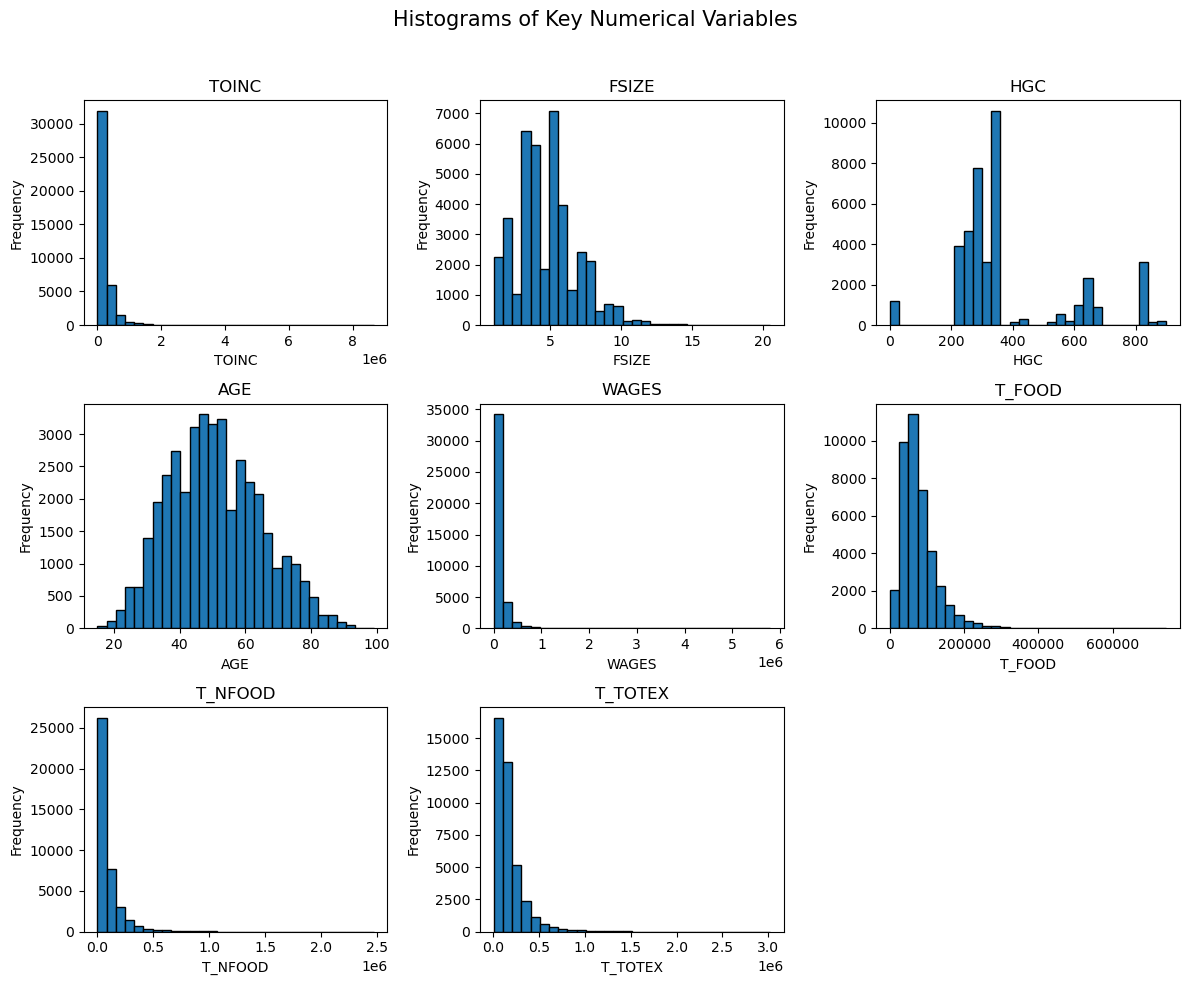

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))  
fig.suptitle("Histograms of Key Numerical Variables", fontsize=15)


axes = axes.flatten()


for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, edgecolor="black")
    axes[i].set_title(col) 
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency") 


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

The TOINC (Total Income) distribution is highly right-skewed, with most values concentrated at the lower end, suggesting that a majority of individuals earn relatively low incomes.

FSIZE (Family Size) shows a peak around small family sizes, indicating that smaller households are more common. HGC (Highest Grade Completed) has distinct peaks, possibly representing key education milestones. 

AGE follows a normal distribution, with most individuals clustered around middle age. 

WAGES is also right-skewed, with a few individuals earning significantly higher wages than the majority. 

T_FOOD (Total Food Expenses) and T_NFOOD (Total Non-Food Expenses) show right-skewed distributions, indicating that most people spend lower amounts on food and non-food items, with a few spending significantly more. 

Lastly, T_TOTEX (Total Expenditure) follows a similar right-skewed pattern, suggesting that a small group has much higher overall spending.

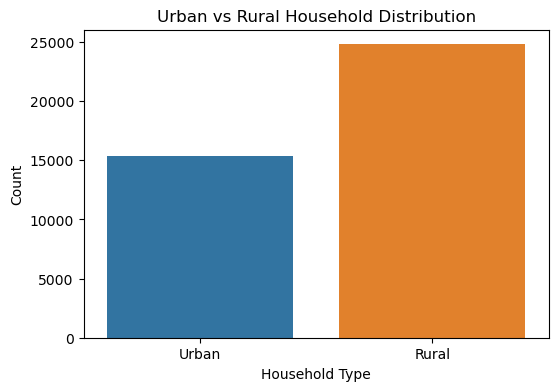

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["URB"])
plt.xticks(ticks=[0, 1], labels=["Urban", "Rural"]) 
plt.title("Urban vs Rural Household Distribution")
plt.xlabel("Household Type")  
plt.ylabel("Count")
plt.show()

The bar chart illustrates the distribution of urban and rural households. It shows that rural households significantly outnumber urban households, with rural areas having over 25,000 households compared to around 15,000 in urban areas. This suggests that the dataset is predominantly rural, which could have implications for analyses related to income, spending, and living conditions. The imbalance in household distribution may also affect generalizability if studying trends that differ between urban and rural settings.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


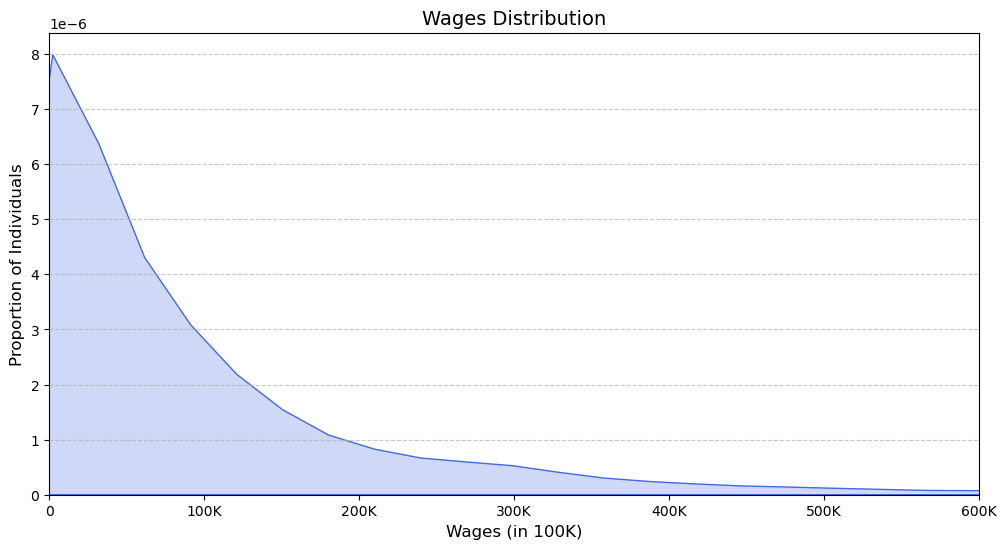

In [13]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df["WAGES"], fill=True, color="royalblue")
plt.title("Wages Distribution", fontsize=14)
plt.xlabel("Wages (in 100K)", fontsize=12)
plt.ylabel("Proportion of Individuals", fontsize=12)  # Renaming Density
plt.xticks(ticks=np.arange(0, 700000, 100000), labels=["0", "100K", "200K", "300K", "400K", "500K", "600K"])
plt.xlim(0, 600000)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The Wages Distribution plot shows that most individuals earn lower wages, with a few earning significantly higher amounts. The distribution is right-skewed, meaning wages are concentrated at the lower end, around 0 - 100K. As wages increase, the number of individuals earning those amounts decreases. The long tail extending toward 600K suggests that a small number of people earn very high salaries, which could indicate income inequality. This pattern is common, as only a few individuals earn exceptionally high wages compared to the majority.

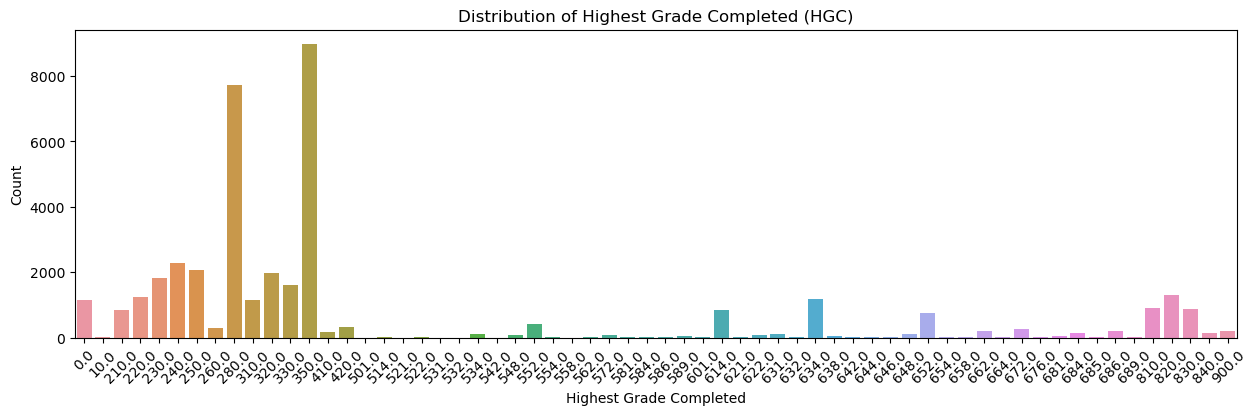

In [14]:
plt.figure(figsize=(15, 4))
sns.countplot(x=df["HGC"], order=sorted(df["HGC"].unique()))
plt.title("Distribution of Highest Grade Completed (HGC)")
plt.xlabel("Highest Grade Completed")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()


The Highest Grade Completed (HGC) Distribution shows the number of individuals based on their highest level of education. The tallest bars appear around grades 10 to 12, meaning most people completed high school. There are smaller peaks at higher education levels, such as college and postgraduate studies, indicating that fewer individuals attain advanced education. The pattern suggests that while high school completion is common, fewer people continue beyond that.

Looking at both graphs together, there may be a relationship between education and income. Since most people have only a high school education, this could explain why wages are concentrated at the lower end. The wage distribution also highlights inequality, as only a small percentage earn significantly higher wages. Overall, these distributions suggest that education levels and wage disparities play a role in income distribution.

### Section 5.2 : Biivariate Analysis

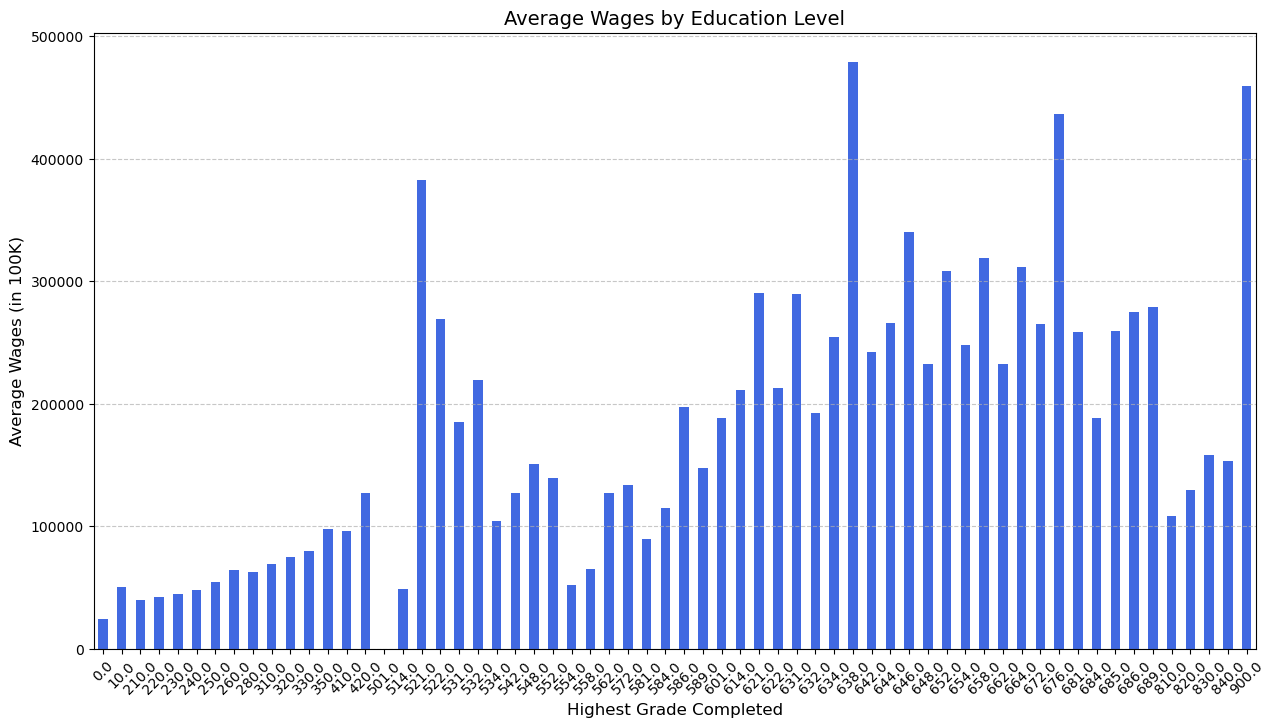

In [15]:
mean_wages = df.groupby("HGC")["WAGES"].mean()
plt.figure(figsize=(15, 8))
mean_wages.plot(kind="bar", color="royalblue")
plt.title("Average Wages by Education Level", fontsize=14)
plt.xlabel("Highest Grade Completed", fontsize=12)
plt.ylabel("Average Wages (in 100K)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The chart shows that as the highest grade completed increases, average wages also tend to rise. This suggests that higher education levels are generally linked to higher earnings. However, there are some fluctuations, meaning that other factors like job type, experience, or industry may also play a role. While education is important, it is not the only factor affecting wages.

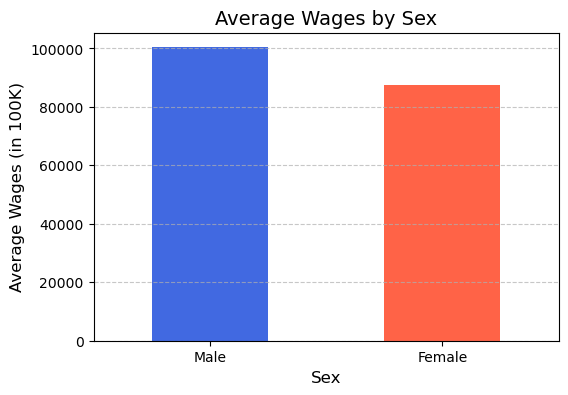

In [16]:
# Mapping for labels (without modifying df)
sex_labels = {1: "Male", 2: "Female"}

# Calculate mean wages by sex
mean_wages_sex = df.groupby("SEX")["WAGES"].mean()
mean_wages_sex.index = mean_wages_sex.index.map(sex_labels)  # Apply mapping only for plotting

# Plot
plt.figure(figsize=(6, 4))
mean_wages_sex.plot(kind="bar", color=["royalblue", "tomato"])

plt.title("Average Wages by Sex", fontsize=14)
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Average Wages (in 100K)", fontsize=12)

plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Males have higher average wages than females, as shown in the bar chart. This suggests a wage gap, but the reasons are not clear from this analysis alone. Factors like education, job type, and experience could influence this difference. More analysis is needed to understand why this gap exists.

### Section 5.3 : Multivariate Analysis

<Figure size 1800x600 with 0 Axes>

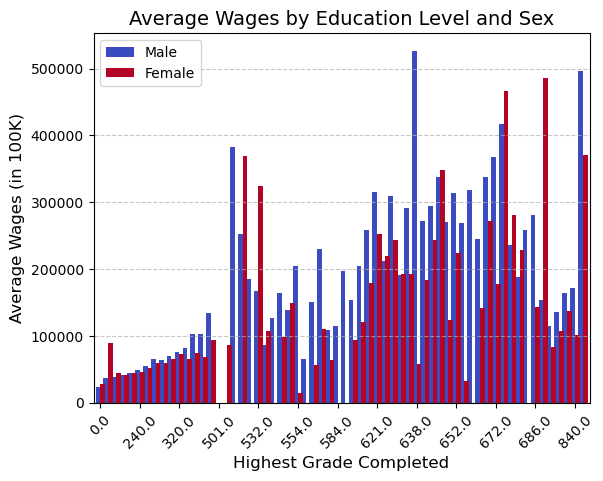

In [17]:
plt.figure(figsize=(18, 6))
mean_wages_edu_sex = df.groupby(["HGC", "SEX"])["WAGES"].mean().unstack()
# Plot with fewer labels
mean_wages_edu_sex.plot(kind="bar", stacked=False, colormap="coolwarm", width=1.2)

# Labels and title
plt.title("Average Wages by Education Level and Sex", fontsize=14)
plt.xlabel("Highest Grade Completed", fontsize=12)
plt.ylabel("Average Wages (in 100K)", fontsize=12)

# Adjust x-axis labels
plt.xticks(ticks=range(0, len(mean_wages_edu_sex), 5), labels=mean_wages_edu_sex.index[::5], rotation=45)

plt.legend(["Male", "Female"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The chart shows the average wages of males and females across different education levels. Generally, higher education levels are associated with higher wages for both sexes. However, males tend to earn slightly more than females at most education levels, indicating a possible gender wage gap.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


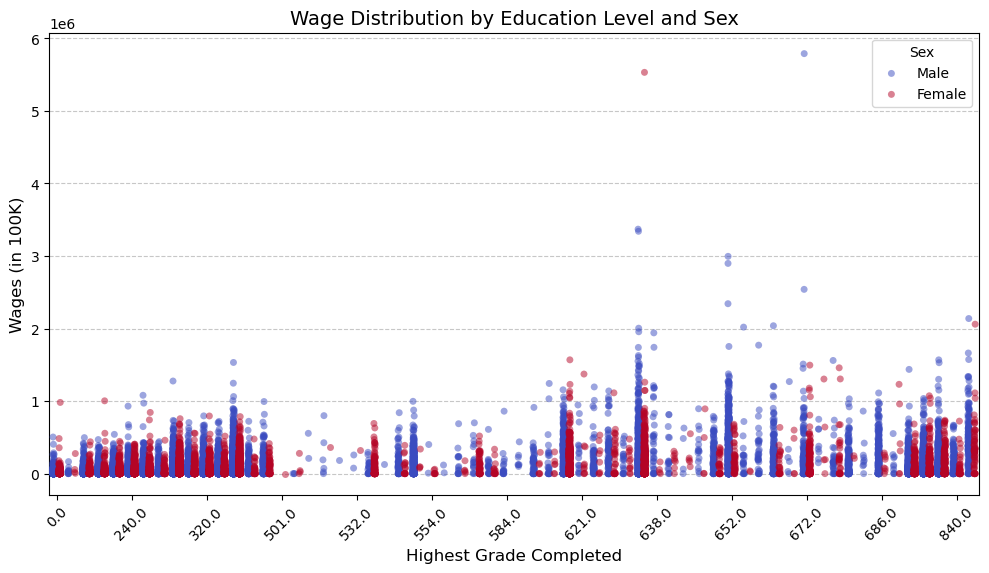

In [18]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="HGC", y="WAGES", hue="SEX", data=df, jitter=True, palette="coolwarm", dodge=True, alpha=0.5)
plt.title("Wage Distribution by Education Level and Sex", fontsize=14)
plt.xlabel("Highest Grade Completed", fontsize=12)
plt.ylabel("Wages (in 100K)", fontsize=12)
plt.xticks(ticks=range(0, len(df["HGC"].unique()), 5), rotation=45)
plt.legend(title="Sex", labels=["Male", "Female"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


This displays the wage distribution across education levels for both males and females. The distribution is highly varied, with some individuals earning significantly more than others at the same education level. There are more extreme outliers among males, suggesting that some men earn exceptionally high wages compared to the rest.

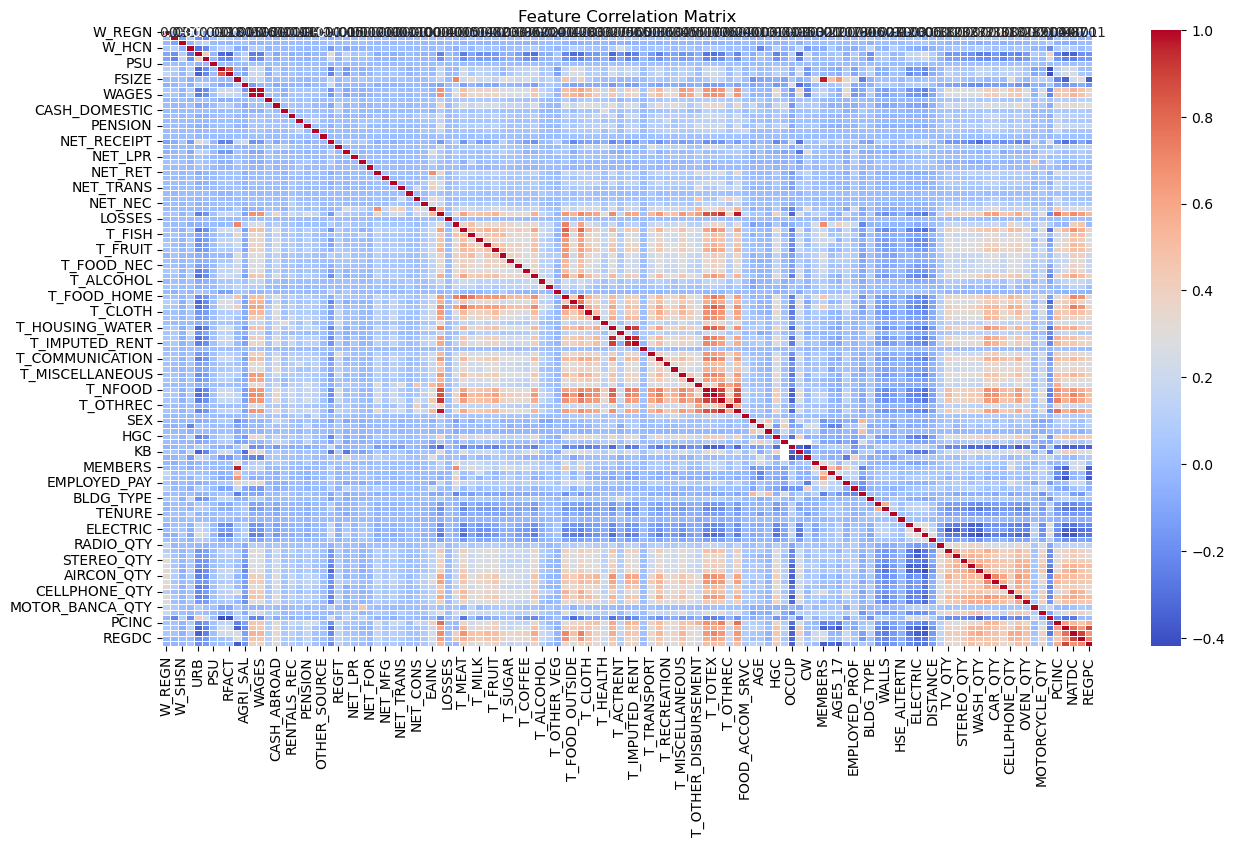

In [19]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

### Section 5.4: Test

In [20]:
important_columns = [
    "FSIZE", "SEX", "AGE", "MS", "HGC", "EMPLOYED_PAY", "EMPLOYED_PROF", "SPOUSE_EMP",
    "WAGES", "EAINC", "TOINC", "CASH_ABROAD", "CASH_DOMESTIC", "PENSION", "DIVIDENDS",
    "HHTYPE", "TENURE", "ELECTRIC", "CAR_QTY", "PC_QTY", "AIRCON_QTY",
    "T_FOOD", "T_TRANSPORT", "T_HOUSING_WATER", "T_EDUCATION", "NATDC", "REGDC", "NATPC"
]

# Create a new DataFrame with only the selected columns
df_filtered = df[important_columns].copy()

# Display the first few rows
print(df_filtered.head())


   FSIZE  SEX   AGE  MS    HGC  EMPLOYED_PAY  EMPLOYED_PROF  SPOUSE_EMP  \
0    3.0    2  75.0   3  280.0          <NA>           <NA>           3   
1   12.5    1  48.0   2  250.0          <NA>              1           2   
2    2.0    1  55.0   2  552.0          <NA>           <NA>           2   
3    4.0    1  44.0   2  830.0          <NA>              1           2   
4    5.0    1  42.0   2  350.0             1              1           2   

     WAGES   EAINC     TOINC  CASH_ABROAD  CASH_DOMESTIC  PENSION  DIVIDENDS  \
0      0.0       0  325251.0       176000          16000    33000          0   
1      0.0  363776  382895.0            0          14700        0          0   
2      0.0    4030  173985.0        95000              0    10500          0   
3      0.0   50260  173303.0        66000              0    14000          0   
4  32000.0   63320  187409.0            0          18000        0          0   

   HHTYPE  TENURE  ELECTRIC  CAR_QTY  PC_QTY  AIRCON_QTY    T_FOOD  

In [21]:
missing_values = df_filtered.isnull().sum()
print(missing_values[missing_values > 0]) 

EMPLOYED_PAY      8296
EMPLOYED_PROF    12698
CAR_QTY          26157
PC_QTY           23430
AIRCON_QTY       25630
dtype: int64


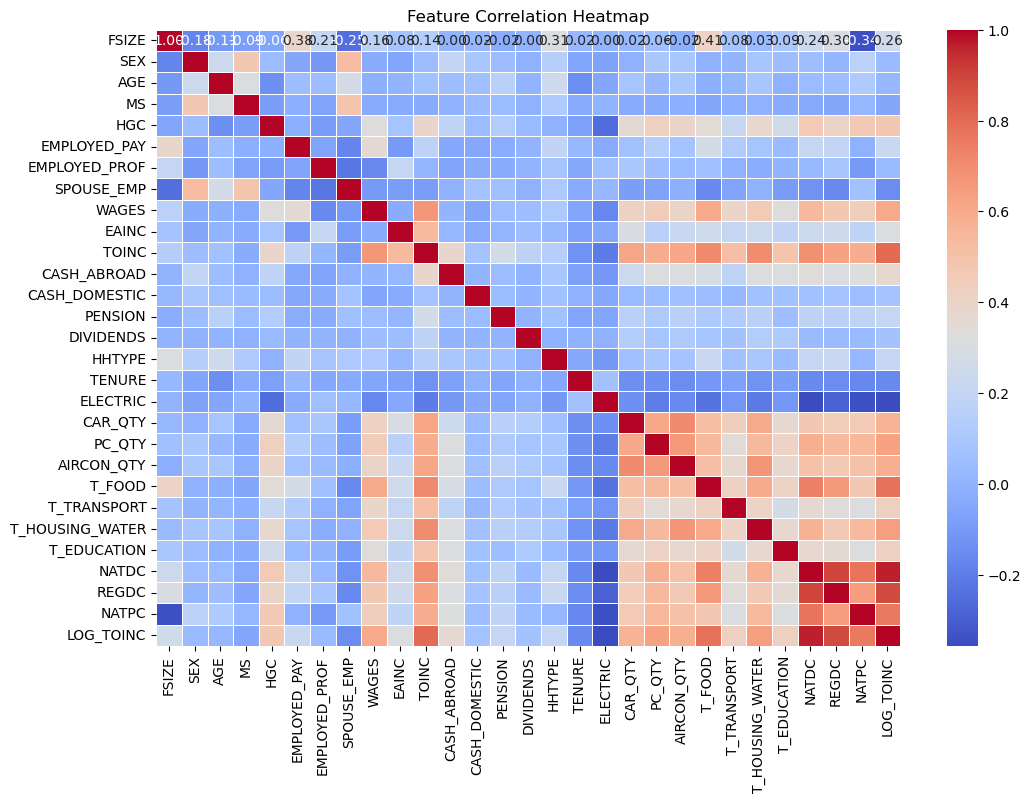

In [24]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

From the heatmap, NATPC has notable correlations with several features:

- LOG_TOINC and TOINC (Total income): Strong positive correlation, indicating that as total income increases, NATPC also tends to increase.
- T_EDUCATION (Education spending): Positive correlation, suggesting that higher education expenses are associated with higher NATPC values.
- T_HOUSING_WATER (Housing & water expenses): Also positively correlated, meaning higher spending in this category is linked to higher NATPC.
- CAR_QTY and PC_QTY (Number of cars and PCs): Moderate positive correlation, implying that ownership of these items may be associated with higher NATPC.
- CASH_ABROAD and CASH_DOMESTIC (Cash flow abroad and domestically): Show weaker but noticeable correlations, suggesting some link between cash transactions and NATPC.

In [25]:
corr_natdc = df.corr()["NATDC"].sort_values(ascending=False)
print("Top correlations with NATDC:\n", corr_natdc.head(30))

Top correlations with NATDC:
 NATDC              1.000000
REGDC              0.896527
NATPC              0.772864
T_FOOD             0.735537
T_TOTEX            0.712380
T_FOOD_HOME        0.706901
TOINC              0.689615
T_MEAT             0.663462
REGPC              0.657806
T_TOREC            0.656218
T_TOTDIS           0.652659
T_NFOOD            0.645498
CELLPHONE_QTY      0.595104
WASH_QTY           0.589807
T_MINERAL          0.586725
PC_QTY             0.584051
T_HOUSING_WATER    0.575184
NONAGRI_SAL        0.554652
REF_QTY            0.550704
T_MISCELLANEOUS    0.544446
WAGES              0.543569
PCINC              0.522884
T_COMMUNICATION    0.522497
T_OIL              0.517103
T_CLOTH            0.511490
AIRCON_QTY         0.504717
T_FOOD_OUTSIDE     0.498457
T_FRUIT            0.496008
OVEN_QTY           0.488636
T_RENTVAL          0.483348
Name: NATDC, dtype: float64


The correlation values indicate how strongly each feature is related to NATDC. A correlation close to 1 means a very strong relationship, while values closer to 0 indicate weaker connections.

1. REGDC (0.896) – This is the strongest correlation, suggesting that NATDC and REGDC are closely related, possibly representing overlapping regional classifications.
2. NATPC (0.773) – A strong positive correlation, meaning that higher NATPC values are associated with higher NATDC values, making NATPC an important predictor.
3. T_FOOD (0.736) & T_FOOD_HOME (0.707) – These suggest that food expenses, both total and home-based, are highly linked to NATDC. This could indicate that food consumption patterns vary significantly across different NATDC classifications.
4. T_TOTEX (0.712) & T_TOTDIS (0.653) – Higher total expenditures and total discretionary spending are correlated with NATDC, meaning spending habits differ by NATDC classification.
5. TOINC (0.690) & PCINC (0.523) – Income-related variables show a strong correlation, suggesting wealthier households tend to belong to certain NATDC categories.
6. T_MEAT (0.663), T_TOREC (0.656), T_NFOOD (0.645) – Spending on meat, recreation, and non-food items are also significantly related, further emphasizing differences in spending behaviors across NATDC.
7. Household Appliances (PC_QTY: 0.584, CELLPHONE_QTY: 0.595, WASH_QTY: 0.590, REF_QTY: 0.551, AIRCON_QTY: 0.505, OVEN_QTY: 0.489) – The number of owned appliances and electronics suggests a link between technological access and NATDC classification, possibly reflecting economic status.
8. T_HOUSING_WATER (0.575) & T_RENTVAL (0.483) – Higher spending on housing and water utilities, as well as rent value, are moderately correlated with NATDC, indicating housing conditions or costs vary significantly across different NATDC groups.
9. T_MISCELLANEOUS (0.544) & T_COMMUNICATION (0.522) – Miscellaneous expenses and communication spending (e.g., internet, phone bills) also show a moderate relationship.

In [49]:
df_filtered["NATDC"].unique()

<IntegerArray>
[8, 9, 6, 10, 5, 3, 7, 1, 4, 2]
Length: 10, dtype: Int64

In [27]:
df_filtered[important_columns].isna().sum()

FSIZE                  0
SEX                    0
AGE                    0
MS                     0
HGC                    0
EMPLOYED_PAY        8296
EMPLOYED_PROF      12698
SPOUSE_EMP             0
WAGES                  0
EAINC                  0
TOINC                  0
CASH_ABROAD            0
CASH_DOMESTIC          0
PENSION                0
DIVIDENDS              0
HHTYPE                 0
TENURE                 0
ELECTRIC               0
CAR_QTY            26157
PC_QTY             23430
AIRCON_QTY         25630
T_FOOD                 0
T_TRANSPORT            0
T_HOUSING_WATER        0
T_EDUCATION            0
NATDC                  0
REGDC                  0
NATPC                  0
dtype: int64

In [28]:
df_filtered[important_columns] = df_filtered[important_columns].fillna(df_filtered[important_columns].median())
df_filtered[important_columns].isna().sum()


FSIZE              0
SEX                0
AGE                0
MS                 0
HGC                0
EMPLOYED_PAY       0
EMPLOYED_PROF      0
SPOUSE_EMP         0
WAGES              0
EAINC              0
TOINC              0
CASH_ABROAD        0
CASH_DOMESTIC      0
PENSION            0
DIVIDENDS          0
HHTYPE             0
TENURE             0
ELECTRIC           0
CAR_QTY            0
PC_QTY             0
AIRCON_QTY         0
T_FOOD             0
T_TRANSPORT        0
T_HOUSING_WATER    0
T_EDUCATION        0
NATDC              0
REGDC              0
NATPC              0
dtype: int64

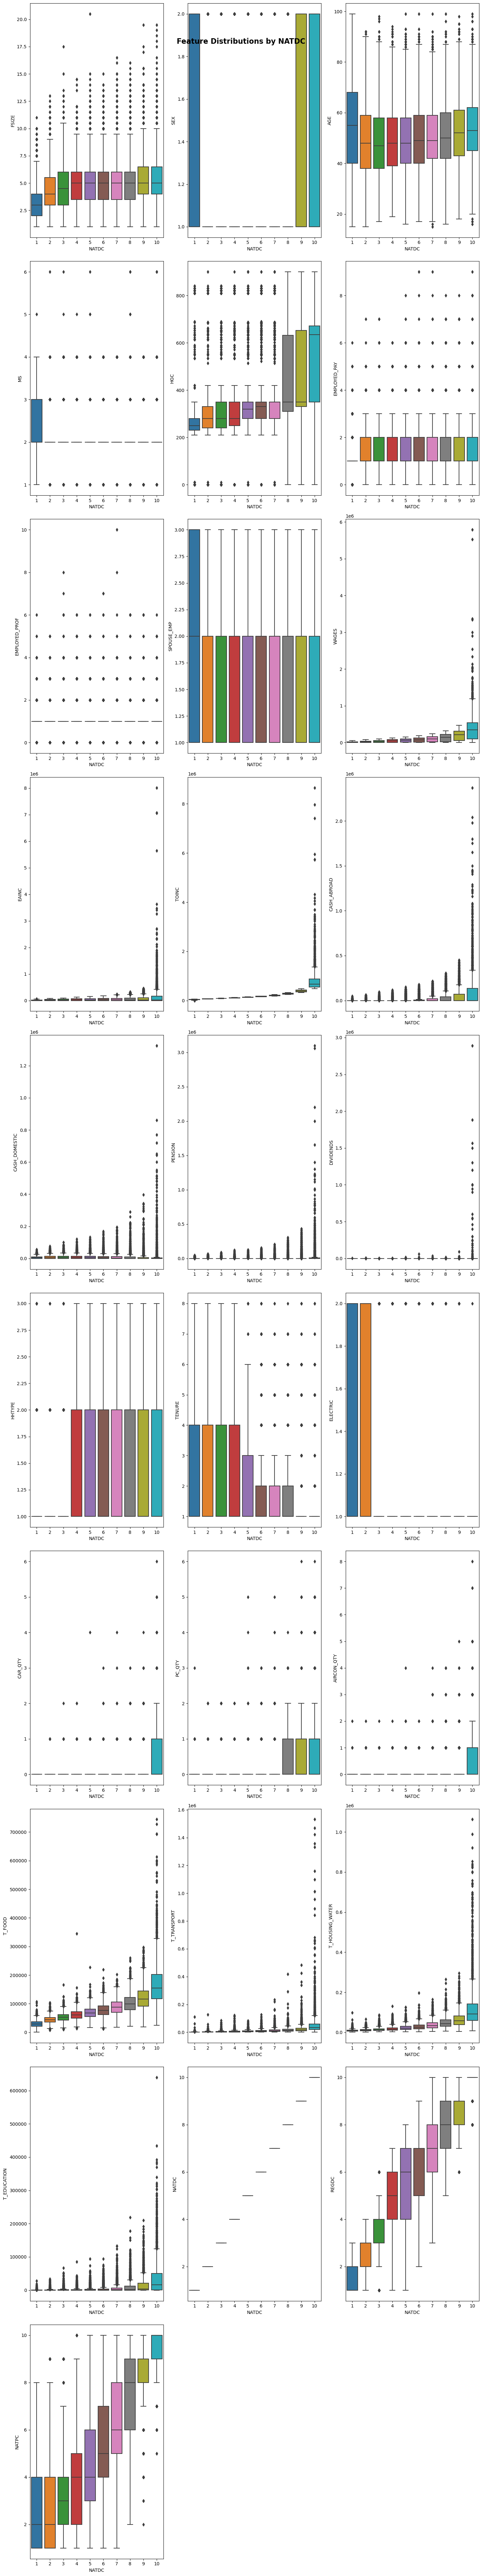

In [50]:
num_features = len(important_columns)
rows = math.ceil(num_features / 3)  # Ensure enough rows
cols = min(3, num_features)  # Max 3 columns

plt.figure(figsize=(15, rows * 8)
for i, col in enumerate(important_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_filtered["NATDC"], y=df_filtered[col])
    plt.xlabel("NATDC")
    plt.ylabel(col)
plt.suptitle("Feature Distributions by NATDC", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


- FSIZE (Household Size) vs. NATDC: Larger household sizes appear in all income levels, but the median stays around 4–6 members. Higher NATDC values (wealthier households) still have large families, meaning income does not necessarily limit family size. However, there are more extreme outliers at higher NATDC levels, suggesting that some wealthier households can afford to support much larger families.
- m
AGE vs. NATDC: The median age remains fairly stable (around 40-50), but lower NATDC values (poorer households) tend to have slightly older individuals. This could mean that younger individuals are more likely to be in wealthier households, possibly due to better job opportunities or financial support. There are also many outliers, suggesting a wide range of ages in all income groups.- 

HGC (Highest Grade Completed) vs. NATDC: As NATDC increases, the highest grade completed also tends to increase. Higher income groups have a wider range of education levels, but their median HGC is noticeably higher than lower NATDC levels. This suggests that education is positively correlated with income, meaning that people in higher income brackets tend to have more years of schoolin- g.

EMPLOYED_PAY vs. NATDC: The number of paid employed individuals stays fairly stable across all NATDC levels, meaning having a paid job is common at all income levels. However, this does not indicate whether job type or salary differs across income gro- ups.

WAGES vs. NATDC: As NATDC increases, wages rise significantly, especially at the highest income levels, where there is a sharp increase. The distribution shows that higher-income groups earn disproportionately more in wages, reinforcing the idea that NATDC is strongly linked to total ear- Inings.

n the EAINC vs. NATDC plot, earnings from other income sources (EAINC) remain low and stable across lower NATDC levels. However, at higher NATDC levels (8-10), there is a noticeable increase, with some extreme values appearing, indicating that individuals in higher NATDC groups tend to have significantly higher additional income - sources.

In the TOINC vs. NATDC plot, total income (TOINC) follows a similar pattern. It remains relatively low and stable at lower NATDC levels but rises sharply at higher NATDC values (9-10), with a substantial spread and extreme values. This suggests that those in higher NATDC groups have much greater tot- al income.

In the CASH_ABROAD vs. NATDC plot, cash from abroad is relatively low for most NATDC levels but increases significantly in the highest groups. This suggests that higher NATDC groups receive more financial support from abroad, possibly through - remittances.

In the CASH_DOMESTIC vs. NATDC plot, cash received from domestic sources remains low for most NATDC levels but shows a sharp increase at higher NATDC values (9-10). This suggests that households in the highest NATDC groups receive significantly more financial support from - local sources.

In the PENSION vs. NATDC plot, pension amounts remain relatively low across lower NATDC levels but increase noticeably at higher NATDC values (8-10). This indicates that individuals in higher NATDC groups are more likely to receive larger pension amounts, possibly due to higher-paying jobs or longer-  work histories.

In the DIVIDENDS vs. NATDC plot, dividend income is almost nonexistent at lower NATDC levels but rises significantly at higher NATDC values (9-10). This suggests that higher NATDC groups have more investments generating returns, which aligns with the trend of increasing wealth and financial asset- s in these groups.

In the HHTYPE vs. NATDC plot, household type remains relatively stable across all NATDC levels. This suggests that the type of household does not significantly change-  as NATDC increases.

In the TENURE vs. NATDC plot, tenure type decreases slightly at higher NATDC levels. This could indicate that higher NATDC groups are more likely to have secure housing arrangements, possibly through ownership rather than renting or - other forms of tenure.

In the GAS_QTY vs. NATDC plot, gas quantity remains low for most NATDC levels but increases slightly at the highest NATDC level. This suggests that households with higher NATDC may have greater ac- cess to or usage of gas.

In the PC_QTY vs. NATDC plot, the number of personal computers is minimal at lower NATDC levels but increases in variation at higher NATDC levels. This indicates that higher NATDC groups tend to own more computers, which may reflect higher income and be- tter access to technology.

In the AIRCON_QTY vs. NATDC plot, air conditioner quantity follows a similar trend, with minimal usage at lower NATDC levels and an increase at the highest NATDC level. This suggests that higher NATDC households are more likely to affo- rd and use air conditioning.

In the T-FOOD vs. NATDC plot, total food expenditure increases as NATDC increases. Higher NATDC levels are associated with greater spending on food, likely reflec- ting higher disposable income.

In the T-TRANSPORT vs. NATDC plot, transportation expenses also rise with NATDC, with greater variation at higher NATDC levels. This suggests that higher NATDC groups may spend more on transportation, possibly due to c- ar ownership or frequent travel.

In the T-HOUSING_WATER vs. NATDC plot, spending on housing and water follows a similar upward trend. Higher NATDC groups allocate significantly more money to housing and water, indicating better living conditions or higher costs-  associated with improved housing.

The T-EDUCATION vs. NATDC plot shows that total education expenditure increases as NATDC increases. Lower NATDC groups (1-4) have relatively low and less variable education spending, while higher NATDC groups (8-10) show a clear increase in both median spending and variability. The highest NATDC group (10) has the widest range of spending, with several outliers indicating significantly higher education expenses. This suggests that wealthier individuals allocate more money to education, likely reflecting access to better schools, private education, and higher education investments.


## Section 6 : Initial Model Training
Use machine learning models to accomplish your chosen task (i.e., classification or regression) for the dataset. In this section of the notebook, please take note of the following:
- The project should train and evaluate <u> at least 3 different kinds</u> of machine learning models. The models should not be multiple variations of the same model, e.g., three neural network models with different number of neurons.
- Each model should be appropriate in accomplishing the chosen task for the dataset. There should be a clear and correct justification on the use of each machine learning model.
- Make sure that the values of the hyperparameters of each model are mentioned. At the minimum, the optimizer, the learning rate, and the learning rate schedule should be discussed per model.
- The report should show that the models are not overfitting nor underfitting.

### Section 6.1 : K-Nearest Neighbor

### Section 6.2 : Linear Regression

### Section 6.3 : Logistic Regression

## Section 7 : Error Analysis
Perform error analysis on the output of all models used in the project. In this section of the notebook, you should:
- Report and properly interpret the initial performance of all models using appropriate evaluation metrics.
- Identify difficult classes and/or instances. For classification tasks, these are classes and/or instances that are difficult to classify. Hint: You may use confusion matrix for this. For regression tasks, these are instances that produces high error.

### Section 7.1 : Error Analysis for K-Nearest Neighbor

### Section 7.2 : Error Analysis for Linear Regression

### Section 7.3 : Error Analysis for Logistic Regression

## Section 8 : Improving Model Performance
Perform grid search or random search to tune the hyperparameters of each model. You should also tune each model to reduce the error in difficult classes and/or instances. In this section of the notebook, please take note of the following:
- Make sure to elaborately explain the method of hyperparameter tuning.
- Explicitly mention the different hyperparameters and their range of values. Show the corresponding performance of each configuration.
- Report the performance of all models using appropriate evaluation metrics and visualizations.
- Properly interpret the result based on relevant evaluation metrics.

### Section 8.1 : Improving K-Nearest Neighbor

### Section 8.2 : Improving Linear Regression

### Section 8.3 : Improving Logistic Regression

## Section 9 : Model Performance Summary
Present a summary of all model configurations. In this section of the notebook, do the following:
- Discuss each algorithm and the best set of values for its hyperparameters. Identify the best model configuration and discuss its advantage over other configurations.
- Discuss how tuning each model helped in reducing its error in difficult classes and/or instances.

## Section 10 : Insights and Conclusion
Clearly state your insights and conclusions from training a model on the data. Why did some models produce better results? Summarize your conclusions to explain the performance of the models. Discuss recommendations to improve the performance of the model.

## Section 11 : References
Cite relevant references that you used in your project. All references must be cited, including:
- Scholarly Articles – Cite in APA format and put a description of how you used it for your work.
- Online references, blogs, articles that helped you come up with your project – Put the website, blog, or article title, link, and how you incorporated it into your work.
- Artificial Intelligence (AI) Tools – Put the model used (e.g., ChatGPT, Gemini), the complete transcript of your conversations with the model (including your prompts and its responses), and a description of how you used it for your work.
